# DS-SF-27 | Codealong 16 | Introduction to Natural Language Processing | Answer Key

## >>> One-time setup

In [1]:
'''
import nltk
nltk.download()
'''

pass

## <<< One-time setup

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import string
import unicodedata
from nltk import tokenize, corpus, stem

from sklearn import feature_extraction, linear_model, ensemble, cross_validation, metrics, decomposition

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Tokenization

In [3]:
def tokenize_text(document):
    document = document.encode('utf-8')

    # Convert text to lowercase
    document = document.lower()

    # Tokenize
    tokens = tokenize.word_tokenize(document)

    # Remove punctuation in tokens and then remove empty tokens
    tokens = [token.translate(None, string.punctuation) for token in tokens]
    tokens = [token for token in tokens if token]

    # Remove stop words
    tokens = [token for token in tokens if not token in corpus.stopwords.words('english')]

    return tokens

In [4]:
tokens = tokenize_text("This is a sentence...  Wait, here's another.  And a third!")

tokens

['sentence', 'wait', 'another', 'third']

## Stemming

In [5]:
class Stemmer:
    stemmer = stem.porter.PorterStemmer()

    @staticmethod
    def stem_tokens(tokens):
        return [Stemmer.stemmer.stem(token) for token in tokens]

In [6]:
tokens = Stemmer.stem_tokens(tokens)

tokens

[u'sentenc', u'wait', u'anoth', u'third']

## Book reviews

Below, we will be analyzing a partial list of the reviews for J.K. Rowling's The Casual Vacancy.  (https://www.amazon.com/dp/0316228532)

Our dataset is a subset of http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Books_5.json.gz.

In [7]:
df = pd.read_csv(os.path.join('..', 'datasets', 'reviews_Books_5-0316228532.csv'))

In [8]:
df

,asin,reviewer_id,reviewer_name,summary,review_text,overall,review_time,unix_review_time,helpful
0,316228532,AY2UIGHCB4VPB,NaN,but a good read!,"A departure for her, but a good read!",5,"07 12, 2014",1405123200,"[0, 0]"
1,316228532,A2L17U0TWH9UWS,1075,Not worth the time,I had a hard time remembering who each charact...,2,"11 12, 2013",1384214400,"[0, 1]"
2,316228532,A2R63TBVG5OAF6,12121,The Casual Vacancy,This is the only review I have ever written. ...,1,"10 1, 2012",1349049600,"[13, 25]"
3,316228532,ACU39L9G696US,123esmo,Expecting more from J.K. Rowling,"I was expecting more from J.K. Rowling, it's a...",2,"01 10, 2013",1357776000,"[0, 1]"
4,316228532,A3N7KY1PBMF880,&#34;Bad Cat!&#34;,Sorry That I Bought It.,As big a fan as I am of J K Rowling's Harry Po...,1,"05 11, 2013",1368230400,"[0, 3]"
...,...,...,...,...,...,...,...,...,...
2045,316228532,A1SCYWLS37YR50,ZC,Spectacular prose in a rambling story,Spectacular prose in a rambling story that see...,5,"02 12, 2014",1392163200,"[1, 1]"
2046,316228532,A1POFVVXUZR3IQ,Z Hayes,"Difficult to get into, but has its moments",Although I am a great fan of the Harry Potter ...,3,"07 18, 2013",1374105600,"[1, 1]"
2047,316228532,A1YSU2VSUJZAR5,zolteg59,The Casual Vacancy,"While the story was intriguing, and I am a hug...",1,"11 11, 2012",1352592000,"[0, 1]"
2048,316228532,A2ZF888HX9YR8E,Zoobeefoo,A better read for Brits perhaps?,What an odd book! The adolescent characters a...,3,"12 30, 2012",1356825600,"[2, 3]"


In [9]:
df.drop(['asin', 'reviewer_id', 'reviewer_name', 'summary', 'review_time', 'unix_review_time', 'helpful'],
    axis = 1,
    inplace = True)

In [10]:
df

,review_text,overall
0,"A departure for her, but a good read!",5
1,I had a hard time remembering who each charact...,2
2,This is the only review I have ever written. ...,1
3,"I was expecting more from J.K. Rowling, it's a...",2
4,As big a fan as I am of J K Rowling's Harry Po...,1
...,...,...
2045,Spectacular prose in a rambling story that see...,5
2046,Although I am a great fan of the Harry Potter ...,3
2047,"While the story was intriguing, and I am a hug...",1
2048,What an odd book! The adolescent characters a...,3


In [11]:
df.overall.value_counts(dropna = False)

4    464
5    457
3    397
2    373
1    359
Name: overall, dtype: int64

In [12]:
df.isnull().sum()

review_text    0
overall        0
dtype: int64

In [13]:
X = df.review_text
c = df.overall.map({1: -1, 2: -1, 3: 0, 4: 1, 5: 1})

In [14]:
X

0                   A departure for her, but a good read!
1       I had a hard time remembering who each charact...
2       This is the only review I have ever written.  ...
3       I was expecting more from J.K. Rowling, it's a...
4       As big a fan as I am of J K Rowling's Harry Po...
                              ...                        
2045    Spectacular prose in a rambling story that see...
2046    Although I am a great fan of the Harry Potter ...
2047    While the story was intriguing, and I am a hug...
2048    What an odd book!  The adolescent characters a...
2049    Chatty and immediately comfortable to read. It...
Name: review_text, dtype: object

In [15]:
c

0       1
1      -1
2      -1
3      -1
4      -1
       ..
2045    1
2046    0
2047   -1
2048    0
2049    1
Name: overall, dtype: int64

## Train/test sets

In [16]:
train_X, test_X, train_c, test_c = cross_validation.train_test_split(X, c, train_size = .6, random_state = 0)

In [17]:
train_X

970     Don't let anyone kid you: there's magic in J.K...
494     JK Rowling can write, no one doubts that.  But...
580     Just because everything has been said about a ...
1038    I was initially intruiged by the summary on th...
1185    An excellent story line. Well written with goo...
                              ...                        
1383    I loved the writing in Harry Potter and I am n...
1731    Even though I knew this would be nothing like ...
763     It took me a while to start to get the large c...
835     Try to think of this is a &#34;first novel,&#3...
1653    (yes, I am a Harry Potter fan)I found the pola...
Name: review_text, dtype: object

## TF-IDF and `TfidfVectorizer`

In [18]:
'''
vectorizer = feature_extraction.text.TfidfVectorizer(stop_words = 'english')
'''

class CustomTokenizer(object):
    def __init__(self):
        self.stemmer = stem.porter.PorterStemmer()

    def __call__(self, document):
        tokens = tokenize_text(document)
        tokens = Stemmer.stem_tokens(tokens)
        return tokens

vectorizer = feature_extraction.text.TfidfVectorizer(tokenizer = CustomTokenizer(), ngram_range = (1, 3), min_df = 3)

In [19]:
vectorizer.fit(train_X)

pass

## Bag-of-words

In [20]:
vectorizer.get_feature_names()

[u'1',
 u'1 star',
 u'10',
 u'100',
 u'100 page',
 u'12',
 u'12 star',
 u'13',
 u'14',
 u'15',
 u'150',
 u'150 page',
 u'16',
 u'1799',
 u'18',
 u'1984',
 u'19th',
 u'1star',
 u'1star review',
 u'2',
 u'2 star',
 u'20',
 u'200',
 u'200 page',
 u'2012',
 u'23',
 u'25',
 u'3',
 u'3 star',
 u'30',
 u'300',
 u'300 page',
 u'34',
 u'34 34',
 u'34 adult',
 u'34 adult 34',
 u'34 bad',
 u'34 book',
 u'34 casual',
 u'34 casual vacanc',
 u'34 charact',
 u'34 enjoy',
 u'34 f',
 u'34 f 34',
 u'34 get',
 u'34 good',
 u'34 harri',
 u'34 harri potter',
 u'34 novel',
 u'34 plot',
 u'34 real',
 u'34 town',
 u'34 word',
 u'35',
 u'35 star',
 u'3rd',
 u'4',
 u'4 5',
 u'4 5 star',
 u'4 letter',
 u'4 letter word',
 u'4 star',
 u'40',
 u'400',
 u'400 page',
 u'45',
 u'5',
 u'5 star',
 u'50',
 u'50 page',
 u'500',
 u'500 page',
 u'503',
 u'503 page',
 u'512',
 u'6',
 u'60',
 u'7',
 u'70',
 u'8',
 u'80',
 u'8211',
 u'8217',
 u'8217 one',
 u'8217 read',
 u'8220',
 u'8221',
 u'abandon',
 u'abbey',
 u'abil',
 u'

## Transform the feature matrix `X`

In [21]:
train_X = vectorizer.transform(train_X)
test_X = vectorizer.transform(test_X)

In [22]:
train_X

<1230x6272 sparse matrix of type '<type 'numpy.float64'>'
	with 79917 stored elements in Compressed Sparse Row format>

While dense matrices store every entry in the matrix, sparse matrices only store the nonzero entries.  Sparse matrices don't have a lot of extra features, and some algorithms may not work for them so you use them when you need to work with matrices that would be too big for the computer to handle them, but they are mostly zero, so they compress easily.  You can convert from sparse matrices to dense matrices with `.todense()`

In [23]:
train_X.todense()

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.06615307],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.23061146, ...,  0.        ,
          0.        ,  0.        ]])

## Machine Learning Modeling

### Logistic Regression

In [24]:
model = linear_model.LogisticRegression()

In [25]:
cross_validation.cross_val_score(model, train_X, train_c, cv = 5).mean()

0.67479799751585789

In [26]:
train_c_hat = cross_validation.cross_val_predict(model, train_X, train_c, cv = 5)

metrics.accuracy_score(train_c, train_c_hat)

0.67479674796747968

In [27]:
pd.crosstab(train_c_hat, train_c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,-1,0,1
Hypothesized Class,,,
-1,318,86,38
0,0,2,0
1,120,156,510


In [28]:
model.fit(train_X, train_c)

pass

In [29]:
model.score(train_X, train_c)

0.82601626016260166

> # Overfit!

In [30]:
model.score(test_X, test_c)

0.698780487804878

### Random Forest

In [31]:
model = ensemble.RandomForestClassifier(n_estimators = 100)

In [32]:
cross_validation.cross_val_score(model, train_X, train_c, cv = 5).mean()

0.64149043117612081

In [33]:
train_c_hat = cross_validation.cross_val_predict(model, train_X, train_c, cv = 5)

metrics.accuracy_score(train_c, train_c_hat)

0.65365853658536588

In [34]:
pd.crosstab(train_c_hat, train_c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,-1,0,1
Hypothesized Class,,,
-1,308,99,53
0,0,2,1
1,130,143,494


In [35]:
model.fit(train_X, train_c)

pass

In [36]:
model.score(train_X, train_c)

1.0

> # Overfit again!

In [37]:
feature_importances = sorted(zip(model.feature_importances_, vectorizer.get_feature_names()), reverse = True)

feature_importances = feature_importances[:50]

feature_importances

[(0.011361673485603732, u'bore'),
 (0.011101703400305508, u'finish'),
 (0.0094261157084627786, u'disappoint'),
 (0.0082549493278225132, u'enjoy'),
 (0.0082315488713345999, u'book'),
 (0.0078582328522394888, u'charact'),
 (0.0073876485532293756, u'rowl'),
 (0.0070100222647319901, u'could'),
 (0.0068563481022866106, u'nt'),
 (0.0056732469434904531, u'would'),
 (0.0055265831576088971, u'stori'),
 (0.005404917464860228, u'small'),
 (0.0052298145835239932, u'love'),
 (0.0050953921243434234, u'tri'),
 (0.0050591209800115011, u'good'),
 (0.0049249468668146387, u'well'),
 (0.0044158953538347622, u'interest'),
 (0.0043791643792477066, u'depress'),
 (0.0043151472341102356, u'page'),
 (0.0041679370053986078, u'wast'),
 (0.0040580560877873737, u'read'),
 (0.0040560238174013833, u'get'),
 (0.0039950593759231082, u'differ'),
 (0.0038269567508063128, u'human'),
 (0.0038016917620338269, u'harri'),
 (0.0037363440038830475, u'town'),
 (0.0037060649847511758, u'mani'),
 (0.0037020302764958495, u'seem'),


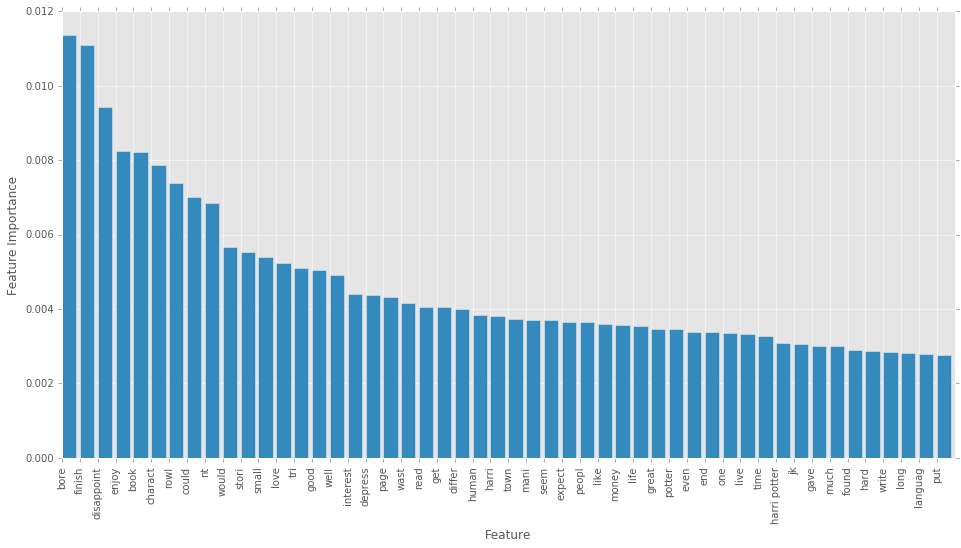

In [38]:
plt.figure(figsize = (16, 8))

plt.bar(
    range(len(feature_importances)),
    [feature_importance[0] for feature_importance in feature_importances]
)

plt.xticks(
    range(len(feature_importances)),
    [feature_importance[1] for feature_importance in feature_importances],
    rotation = 90
)

plt.xlabel('Feature')
plt.ylabel('Feature Importance')

In [39]:
model.score(test_X, test_c)

0.65243902439024393

### PCA

In [40]:
pca = decomposition.PCA().fit(train_X.todense())

In [41]:
normalized_eigenvalues = pca.explained_variance_ratio_

In [42]:
normalized_eigenvalues = normalized_eigenvalues[:50]

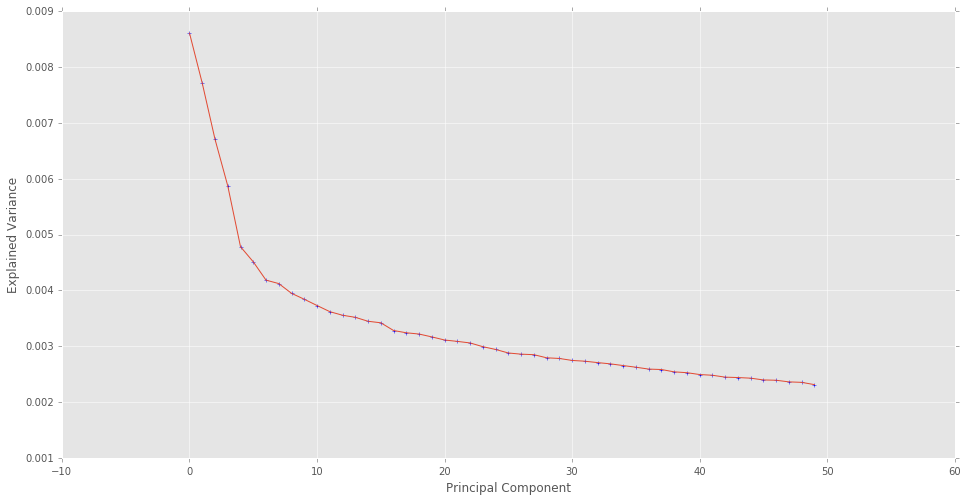

In [43]:
plt.figure(figsize = (16, 8))

plt.plot(normalized_eigenvalues)

plt.scatter(x = range(len(normalized_eigenvalues)),
    y = normalized_eigenvalues,
    marker = '+',
    s = 10)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

In [44]:
cumulated_normalized_eigenvalues = np.cumsum(normalized_eigenvalues)

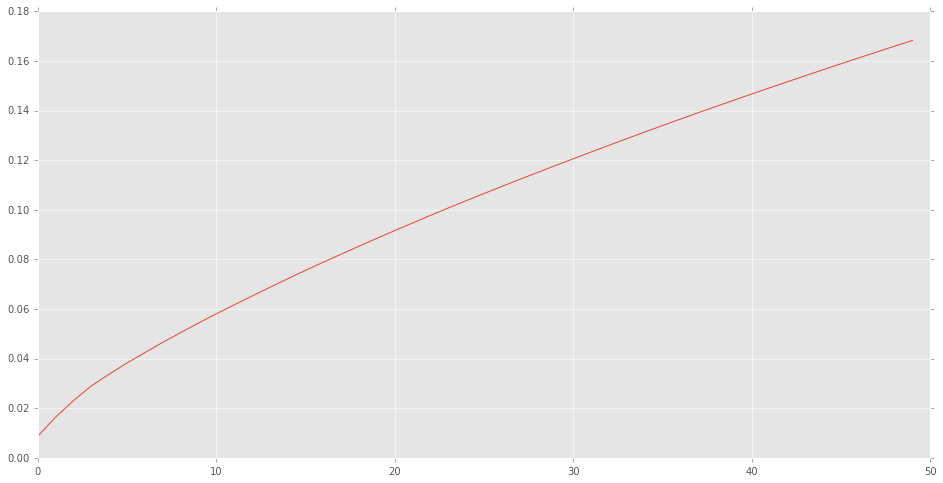

In [45]:
plt.figure(figsize = (16, 8))
plt.plot(cumulated_normalized_eigenvalues)

In [46]:
def interpret(v):
    tokens = pd.Series(vectorizer.get_feature_names())

    v = pd.Series(v).\
        sort_values(ascending = False)

    for token in tokens[v.head(5).index]:
        print '+ {}'.format(token)

    print

    for token in tokens[v.tail(5).index]:
        print '- {}'.format(token)

In [47]:
for i in range(7):
    print 'component {}'.format(i)
    interpret(pca.components_[i])
    print "===\n"

component 0
+ 34
+ finish
+ interest
+ slow
+ well written

- vacanc
- casual
- nt
- rowl
- book
===

component 1
+ 34
+ town
+ small
+ charact
+ small town

- read
- potter
- harri potter
- harri
- book
===

component 2
+ 34
+ potter
+ harri potter
+ harri
+ potter seri

- mani charact
- mani
- book
- charact
- nt
===

component 3
+ potter
+ harri potter
+ harri
+ town
+ small

- get
- finish
- book
- nt
- 34
===

component 4
+ well
+ book
+ read
+ charact
+ well written

- jk rowl
- casual vacanc
- vacanc
- jk
- rowl
===

component 5
+ well
+ book
+ jk
+ jk rowl
+ rowl

- seri
- potter seri
- stori
- mani charact
- mani
===

component 6
+ nt
+ well
+ written
+ could nt
+ well written

- 8217
- read
- casual vacanc
- casual
- vacanc
===

